# Edge detection and Hough Transform for Cricle detection

### Import necessary dependencies. Adjust display settings.

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import math,sys,scipy
from math import cos,sin,pi

from scipy import signal
from collections import defaultdict
from PIL import Image, ImageDraw

### Thresholding the input image.

In [2]:
def thres(threshold,Smag):
    max_value = np.amax(Smag)
    threshold *= max_value
    for i in range(1,len(Smag)):
        for j in range(1,len(Smag[1])):
            if Smag[i,j] > threshold :
                Smag[i,j] = 255
            else:
                Smag[i,j] = 0
    return Smag

### Create Sobel edges.

In [3]:
def Sobel(imge,threshold):
    imge = np.array(imge)
    width = len(imge)
    height = len(imge[1])
    if len(imge.shape) == 3:
        iya = np.zeros((width,height))
        for i in range(1,width):
            for j in range(1,height):
                s = 0
                for z in range(0,2):
                    s += imge[i,j,z]
                iya[i,j] = s/3
    else:
        iya = imge
    
    Cx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    Cy = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

    Sx = scipy.signal.convolve2d(iya,Cx,mode='full', boundary='fill', fillvalue=0)
    Sy = scipy.signal.convolve2d(iya,Cy,mode='full', boundary='fill', fillvalue=0)

    Smag = abs(Sx) + abs(Sy)
    Simage = thres(threshold,Smag)
    return Simage

### Apply Hough transform.

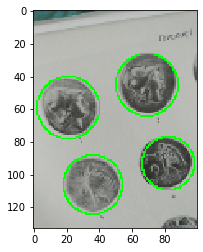

In [4]:
rmin = 10
rmax = 20
theta = 360
threshold = 0.18

#For coins use threshold = 0.18 and votes >= 355
#For firstfloor use threshold = 0.20 and votes >= 360

def Hough():
    #LOAD IMAGE
    Img = Image.open("C:\\Users\\me\\Desktop\\Images\\cv_coins2.png")
    img = np.array(Image.open("C:\\Users\\me\\Desktop\\Images\\cv_coins2.png"))
    size_of_image = Img.size
 
    image = Image.new("RGB", size_of_image)
    image.paste(Img)

    #GET EDGES
    edges = Sobel(img,threshold)
    rows = len(edges)
    cols = len(edges[0])

    #CREATE ACCUMULATOR
    Acc = defaultdict(int)
    for x in range(rows):
        for y in range(cols):
            if edges[x,y] == 255:
                for r in range(rmin, rmax+1):
                    for t in range(0,theta,1):
                        a = x - abs(int(r * cos(pi*t/180)))
                        b = y - abs(int(r * sin(pi*t/180)))
                        Acc[(a,b,r)] += 1

    #FIND CIRCLES WITH MOST VOTES
    circles = []
    sorted_Acc =  sorted(Acc.items(), key=lambda i: -i[1])

    for c,votes in sorted_Acc:
            a, b, r = c
            if votes >= 355 and all(abs(x-a)>7 and abs(y-b)>8 for x,y,r in circles):
                circles.append((a,b,r))

    ready_image = ImageDraw.Draw(image)
    for a, b, r in circles:
        ready_image.ellipse((b-r, a-r, b+r, a+r), outline=(0,255,0,0))

    #SAVE IMAGE
    imgplot = plt.imshow(image)
    plt.show()
Hough()

### Do the same for a real world image. Adjust the parameters to get better results.

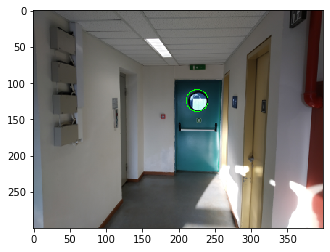

In [5]:
rmin = 10
rmax = 20
theta = 360
threshold = 0.20

#For coins use threshold = 0.18 and votes >= 355
#For firstfloor use threshold = 0.20 and votes >= 360

def Hough():
    #LOAD IMAGE
    Img = Image.open("C:\\Users\\me\\Desktop\\Images\\cv_firstfloor.png")
    img = np.array(Image.open("C:\\Users\\me\\Desktop\\Images\\cv_firstfloor.png"))
    size_of_image = Img.size

    image = Image.new("RGB", size_of_image)
    image.paste(Img)

    #GET EDGES
    edges = Sobel(img,threshold)
    rows = len(edges)
    cols = len(edges[0])

    #CREATE ACCUMULATOR
    Acc = defaultdict(int)
    for x in range(rows):
        for y in range(cols):
            if edges[x,y] == 255:
                for r in range(rmin, rmax+1):
                    for t in range(0,theta,1):
                        a = x - abs(int(r * cos(pi*t/180)))
                        b = y - abs(int(r * sin(pi*t/180)))
                        Acc[(a,b,r)] += 1

    #FIND CIRCLES WITH MOST VOTES
    circles = []
    sorted_Acc =  sorted(Acc.items(), key=lambda i: -i[1])

    for c,votes in sorted_Acc:
            a, b, r = c
            if votes >= 360 and all(abs(x-a)>7 and abs(y-b)>8 for x,y,r in circles):
                circles.append((a,b,r))

    ready_image = ImageDraw.Draw(image)
    for a, b, r in circles:
         ready_image.ellipse((b-r, a-r, b+r, a+r), outline=(0,255,0,0))

    #SAVE IMAGE
    imgplot = plt.imshow(image)
    plt.show()

Hough()